In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# DataBlock
---

## Understanding DataBlock

In [2]:
from fastai.vision.all import *

### Download Data(Images)

In [3]:
# download image data
path = untar_data(URLs.PETS)

In [4]:
# path of the data
path

Path('/root/.fastai/data/oxford-iiit-pet')

In [5]:
# content of the downloaded data
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

The data contains two folders:
1. images
2. annotations

In [6]:
# let's check images folder
images = (path/"images").ls()
images

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_115.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_18.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_157.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_28.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_6.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_79.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_265.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_182.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_89.jpg')...]

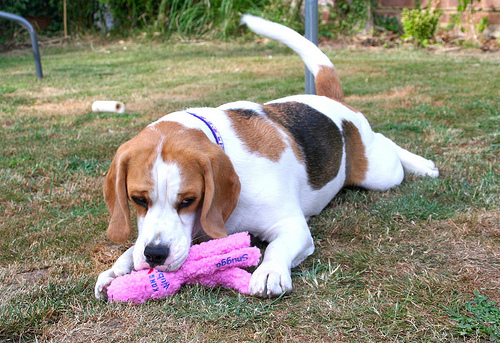

In [7]:
PILImage.create(images[0])

In [8]:
annotations = (path/"annotations").ls()
annotations

(#7) [Path('/root/.fastai/data/oxford-iiit-pet/annotations/xmls'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/README'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/._trimaps'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/list.txt'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/test.txt'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trainval.txt'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps')]

In [9]:
annotations[0]

Path('/root/.fastai/data/oxford-iiit-pet/annotations/xmls')

In [10]:
!ls $path

annotations  images


In [11]:
!ls $path/"images"

Abyssinian_1.jpg		   english_cocker_spaniel_184.jpg
Abyssinian_10.jpg		   english_cocker_spaniel_185.jpg
Abyssinian_100.jpg		   english_cocker_spaniel_186.jpg
Abyssinian_100.mat		   english_cocker_spaniel_187.jpg
Abyssinian_101.jpg		   english_cocker_spaniel_188.jpg
Abyssinian_101.mat		   english_cocker_spaniel_189.jpg
Abyssinian_102.jpg		   english_cocker_spaniel_19.jpg
Abyssinian_102.mat		   english_cocker_spaniel_190.jpg
Abyssinian_103.jpg		   english_cocker_spaniel_191.jpg
Abyssinian_104.jpg		   english_cocker_spaniel_192.jpg
Abyssinian_105.jpg		   english_cocker_spaniel_193.jpg
Abyssinian_106.jpg		   english_cocker_spaniel_194.jpg
Abyssinian_107.jpg		   english_cocker_spaniel_195.jpg
Abyssinian_108.jpg		   english_cocker_spaniel_196.jpg
Abyssinian_109.jpg		   english_cocker_spaniel_197.jpg
Abyssinian_11.jpg		   english_cocker_spaniel_198.jpg
Abyssinian_110.jpg		   english_cocker_spaniel_199.jpg
Abyssinian_111.jpg		   english_cocker_spaniel_2.jpg
Abyssinian_112.jpg		   english_cock

In [12]:
!ls $path/"annotations"

README	list.txt  test.txt  trainval.txt  trimaps  xmls


In [13]:
!cat $path/"annotations"/README

OXFORD-IIIT PET Dataset
-----------------------
Omkar M Parkhi, Andrea Vedaldi, Andrew Zisserman and C. V. Jawahar

We have created a 37 category pet dataset with roughly 200 images for each class. 
The images have a large variations in scale, pose and lighting. All images have an 
associated ground truth annotation of breed, head ROI, and pixel
level trimap segmentation.

Contents:
--------
trimaps/ 	Trimap annotations for every image in the dataset
		Pixel Annotations: 1: Foreground 2:Background 3: Not classified
xmls/		Head bounding box annotations in PASCAL VOC Format

list.txt	Combined list of all images in the dataset
		Each entry in the file is of following nature:
		Image CLASS-ID SPECIES BREED ID
		ID: 1:37 Class ids
		SPECIES: 1:Cat 2:Dog
		BREED ID: 1-25:Cat 1:12:Dog
		All images with 1st letter as captial are cat images while
		images with small first letter are dog images.
trainval.txt	Files describing splits used in the paper.However,
test.txt	you are encouraged to try ra

### get_image_files
Get image files in `path` recursively, only in `folders`, if specified.

In [14]:
files = get_image_files(path)
files

(#14780) [Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_115.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_18.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_157.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_28.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_6.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_79.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_265.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_182.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_89.jpg')...]

## Create DataBlock

In [15]:
dblock = DataBlock()

DataBlock can create both:
1. **datasets**
```python
dblock.datasets
```


2. **dataloaders**
```python
dblock.dataloaders
```


### Create datasets

In [16]:
dblock = DataBlock(get_items = get_image_files)
dataset = dblock.datasets(path)
dataset

(#14780) [(Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_115.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_115.jpg')),(Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_18.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_18.jpg')),(Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_157.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_157.jpg')),(Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_28.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_28.jpg')),(Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_6.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_6.jpg')),(Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_79.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_79.jpg')),(Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_128.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_12

We had to provide `get_items = get_image_files` while instantiating `DataBlock` because while creating `dataset` we are providing `path` and to unpack that we are using `get_items = get_image_files`.

In [17]:
# returns x & y
dataset[0]

(Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_115.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_115.jpg'))

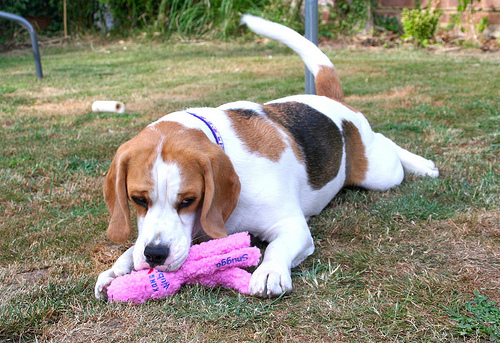

In [18]:
PILImage.create(dataset[0][0])

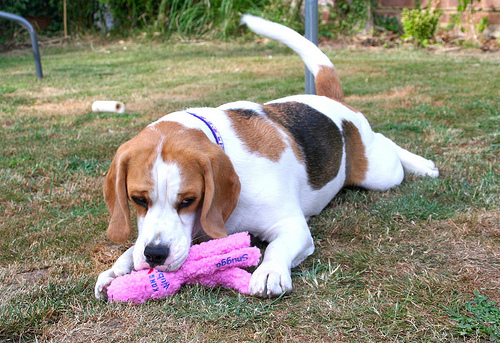

In [19]:
PILImage.create(dataset[0][1])